In [1]:

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import os
import glob as glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar

In [71]:
mT = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_dtdt.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mua = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_uadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mva = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_vadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mwa = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_wadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mq = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_qnet.nc').sel(lat=slice(-40,30),lon=slice(30,125))
#obs heat budget
gT = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_dtdt.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gua = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_uadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gva = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_vadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gwa = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_wadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gq = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_qnet.nc').sel(lat=slice(-40,30),lon=slice(30,125))
#model compoenents advection
mdx = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_dtdx.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mdy = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_dtdy.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mdz = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_dtdz.nc').sel(lat=slice(-40,30),lon=slice(30,125))
muc = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_ucur.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mvc = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_vcur.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mwc = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_wcur.nc').sel(lat=slice(-40,30),lon=slice(30,125))
#godas compoents advection
gdx = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_dtdx.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gdy = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_dtdy.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gdz = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_dtdz.nc').sel(lat=slice(-40,30),lon=slice(30,125))
guc = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_ucur.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gvc = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_vcur.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gwc = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_wcur.nc').sel(lat=slice(-40,30),lon=slice(30,125))
#wind
#godas
#guw = xr.open_dataarray('/g/data/e14/sm2435/OBSwind_u.nc').sel(lat=slice(-40,30),lon=slice(30,125))
#gvw = xr.open_dataarray('/g/data/e14/sm2435/OBSwind_v.nc').sel(lat=slice(-40,30),lon=slice(30,125))
#Model
#muw = xr.open_dataarray('/g/data/e14/sm2435/Ewind_u.nc').sel(lat=slice(-40,30),lon=slice(30,125))
#mvw = xr.open_dataarray('/g/data/e14/sm2435/Ewind_v.nc').sel(lat=slice(-40,30),lon=slice(30,125))

In [44]:
def plot_background(ax, i, j):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 125., -20., 20.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    if i == 1:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    if j > 0:
        gl.left_labels = False
    return ax

def plot_(dict_name, minv, maxv):
    fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(20, 4), sharey='all', sharex='all', 
                             subplot_kw={'projection':ccrs.PlateCarree()})
    #unpack dict
    for num, key in enumerate(dict_name.keys()):
        var = dict_name[key]
        lons = var.lon
        lats = var.lat
        #dTdt
        axes[0,num].set_title(key)
        axi=0
        for i in [0, 6]:
            if i ==6:
                j = 1
            else:
                j = 0
            axes[j, num].pcolormesh(lons, lats, var.sel(month = (i+1)), 
                                #levels = 41, 
                                cmap = 'RdBu_r', 
                                #add_colorbar=True, 
                                vmin = minv, vmax = maxv, 
                                transform=ccrs.PlateCarree())
                
            plot_background(axes[j, num], j, num)
            axi=axi+1
    cbar_ax2 = fig.add_axes([0.95, 0.3, 0.01, 0.4])
    cmap2 = plt.cm.RdBu_r
    bounds = np.linspace(minv, maxv, 41)
    norm2 = mpl.colors.BoundaryNorm(bounds, cmap2.N)
    cb = mpl.colorbar.ColorbarBase(cbar_ax2, cmap=cmap2, norm=norm2,
        spacing='proportional', boundaries=bounds)
    axes[0, 0].text(-1.7,0.5, 'Jan')
    axes[1, 0].text(-1.7,0.5, 'July')
    #fig.tight_layout()
    return fig


In [45]:
ACCESS_DICT = {'$dT/dt$':mT, '$Q_{net}$':mq, '$Advection_{u}$':-mua, '$Advection_{v}$':-mva, '$Advection_{w}$':-mwa, '$Residual$':(mT-mq+mva+mua+mwa)}

In [46]:
GODAS_DICT = {'$dT/dt$':gT, '$Q_{net}$':gq, '$Advection_{u}$':-gua, '$Advection_{v}$':-gva, '$Advection_{w}$':-gwa, '$Residual$':(gT-gq+gva+gua+gwa)}

In [47]:
DIFF_DICT = {'$dT/dt$':(mT-gT), '$Q_{net}$':(mq-gq), '$Advection_{u}$':(-mua--gua), '$Advection_{v}$':(-mva--gva), '$Advection_{w}$':(-mwa--gwa), '$Residual$':((mT-mq+mva+mua+mwa)-(gT-gq+gva+gua+gwa))}

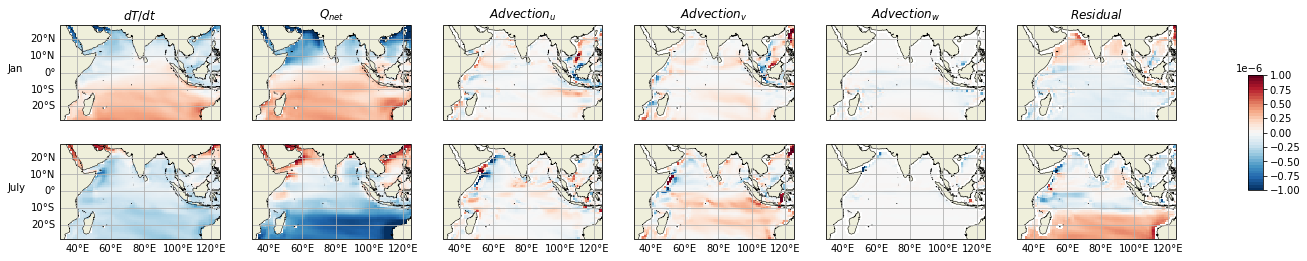

In [48]:
new = plot_(ACCESS_DICT, -1e-6, 1e-6)

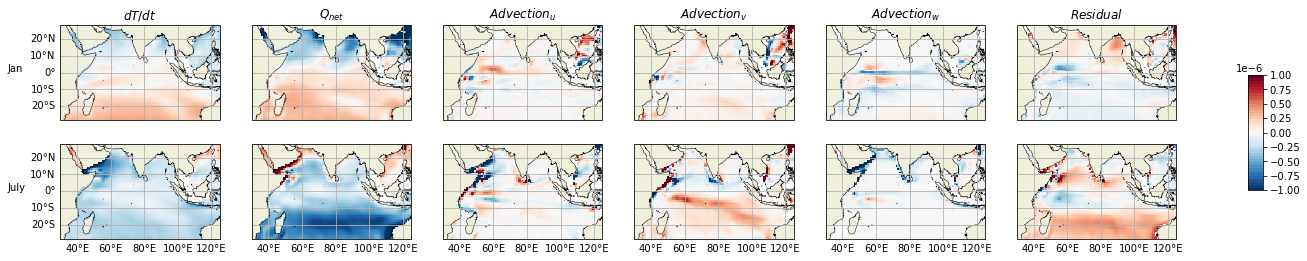

In [49]:
new = plot_(GODAS_DICT, -1e-6, 1e-6)

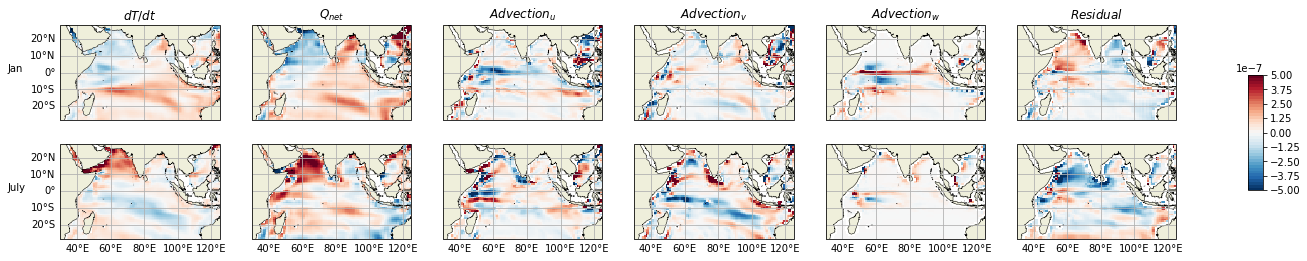

In [50]:
new = plot_(DIFF_DICT, -5e-7, 5e-7)

In [51]:
#####line plots

In [52]:
#fucntion to get terms in a region
#lets extract data from one point
def get_region(DS, lat, lat_r, lon, lon_r):
    setio = DS.sel(lat=slice(lat, lat+lat_r),lon=slice(lon, lon+lon_r)).mean(['lat', 'lon'])
    return setio

In [53]:
def line_plot_all(lat, latr, lon, lonr):
    lat2 = lat + latr
    lon2 = lon + lonr
    #DEFINE DICT OF VARIABLES BY  SOURCE
    var_l = {'model':{'T':mT, 'U':mua, 'V':mva, 'W':mwa, 'Q':mq}, 
             'godas':{'T':gT, 'U':gua, 'V':gva, 'W':gwa, 'Q':gq}}    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), sharey='all', sharex='all')
    axes[0].plot(range(1,13), get_region((mT*(3986*1026*50)), lat, latr, lon, lonr), label = 'Temperature tendency')
    axes[0].plot(range(1,13), get_region((mq*(3986*1026*50)), lat, latr, lon, lonr), label = 'Qnet')
    axes[0].plot(range(1,13), get_region((mua)*(-3986*1026*50), lat, latr, lon, lonr), label = '-U Advection')
    axes[0].plot(range(1,13), get_region((mva)*(-3986*1026*50), lat, latr, lon, lonr), label = '-V Advection')
    axes[0].plot(range(1,13), get_region((mwa)*(-3986*1026*50), lat, latr, lon, lonr), label = '-W Advection')
    axes[0].plot(range(1,13), get_region((mT-mq+mva+mua+mwa)*(3986*1026*50), lat, latr, lon, lonr) ,label = 'Residual', c = 'k')

    axes[0].axhline(0, c = 'k', ls = '--', lw = 0.5)

    axes[0].set_title('a ACCESS-CM2')
    axes[0].set_ylabel('$Wm^{-2}$')
    axes[0].set_xlabel('$month$')

    
    axes[1].plot(range(1,13), get_region((gT*(3986*1026*50)), lat, latr, lon, lonr), label = 'Temperature tendency')
    axes[1].plot(range(1,13), get_region((gq*(3986*1026*50)), lat, latr, lon, lonr), label = 'Qnet')
    axes[1].plot(range(1,13), get_region((gua)*(-3986*1026*50), lat, latr, lon, lonr), label = '-U Advection')
    axes[1].plot(range(1,13), get_region((gva)*(-3986*1026*50), lat, latr, lon, lonr), label = '-V Advection')
    axes[1].plot(range(1,13), get_region((gwa)*(-3986*1026*50), lat, latr, lon, lonr), label = '-W Advection')    
    axes[1].plot(range(1,13), get_region((gT-gq+gua+gva+gwa)*(3986*1026*50), lat, latr, lon, lonr) ,label = 'Heat flux-Advection', c = 'k')

    axes[1].set_title('b) GODAS')
    axes[1].set_xlabel('$month$')

    axes[1].axhline(0, c = 'k', ls = '--', lw = 0.5)

    axes[2].plot(range(1,13), 
                     (get_region(((mT)*(3986*1026*50)), lat, latr, lon, lonr) - 
                     get_region(((gT)*(3986*1026*50)), lat, latr, lon, lonr)),
                     label = '$dT/dt$')
    axes[2].plot(range(1,13), 
                     (get_region(((mq)*(3986*1026*50)), lat, latr, lon, lonr) - 
                     get_region(((gq)*(3986*1026*50)), lat, latr, lon, lonr)),
                     label = '$Q_{net}$')

    axes[2].plot(range(1,13), 
                     (get_region(((mua)*(-3986*1026*50)), lat, latr, lon, lonr) - 
                     get_region(((gua)*(-3986*1026*50)), lat, latr, lon, lonr)),
                     label = '$Advection_{u}$')
    axes[2].plot(range(1,13), 
                     (get_region(((mva)*(-3986*1026*50)), lat, latr, lon, lonr) - 
                     get_region(((gva)*(-3986*1026*50)), lat, latr, lon, lonr)),
                     label = '$Advection_{v}$')
    
    axes[2].plot(range(1,13), 
                     (get_region(((mwa)*(-3986*1026*50)), lat, latr, lon, lonr) - 
                     get_region(((gwa)*(-3986*1026*50)), lat, latr, lon, lonr)),
                     label = '$Advection_{w}$')
    
    axes[2].plot(range(1,13), 
                     (get_region(((mT-mq+mva+mua+mwa)*(3986*1026*50)), lat, latr, lon, lonr) - 
                     get_region(((gT-gq+gua+gva+gwa)*(3986*1026*50)), lat, latr, lon, lonr)),
                     label = '$Residual$', c = 'k')

    axes[2].axhline(0, c = 'k', ls = '--', lw = 0.5)
    
    axes[2].set_title('c) ACCESS-CM2 - GODAS')
    axes[2].set_xlabel('$month$')

    #fig.suptitle(f"Heat budget terms, Seychelles-Chagos Thermocline ridge")
                 #{lon}-{lon2}E, {lat}-{lat2}N")
    axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[2].set_xticks(np.arange(1,13,1))
    #for a in fig.axes:
    #    a.tick_params(
    #    axis='x',           # changes apply to the x-axis
    #    which='both',       # both major and minor ticks are affected
    #    bottom=True,
    #    top=False,
    #    labelbottom=True)
    

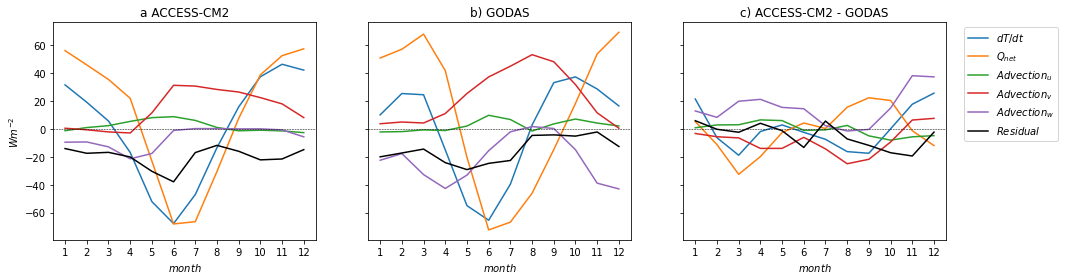

In [54]:
line_plot_all(-12,7,50,20)

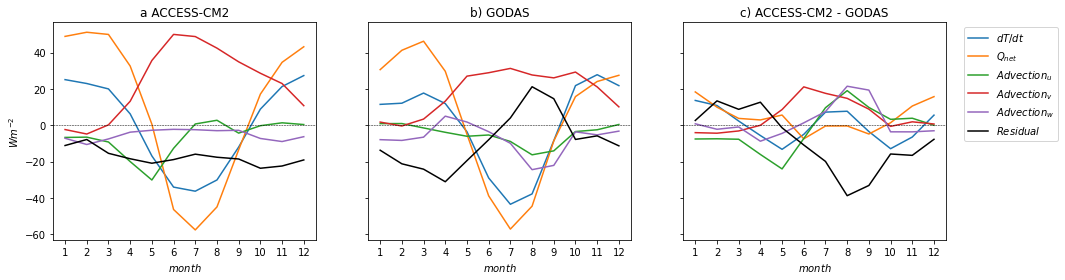

In [55]:
#SETIO
line_plot_all(-10,10,90,20)

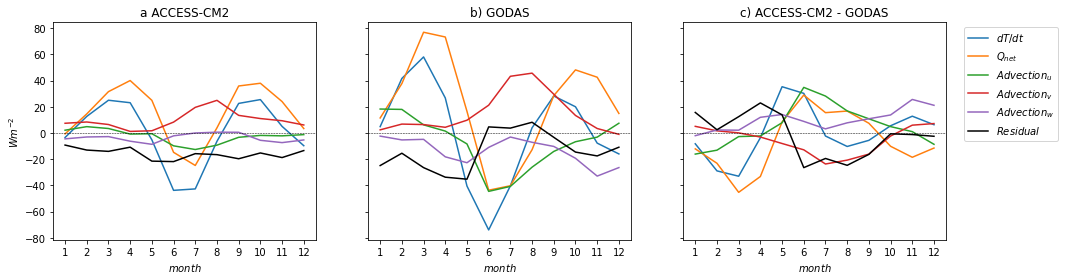

In [56]:
#WTIO
line_plot_all(-10,20,50,20)

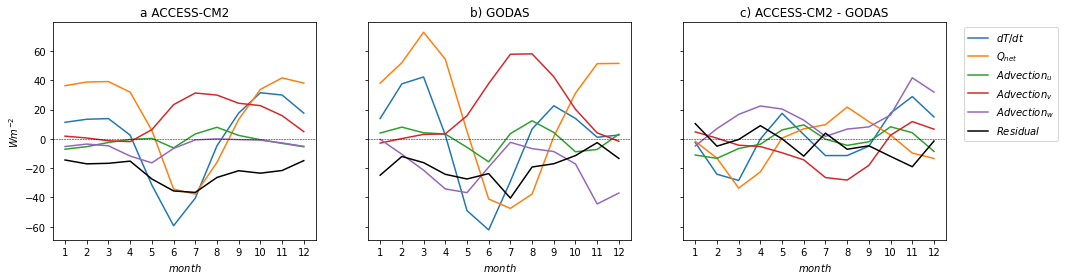

In [57]:
#WTIO_N
line_plot_all(-10,10,50,20)

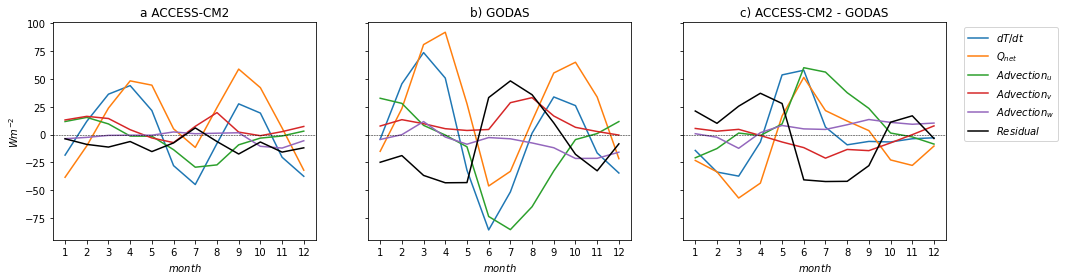

In [58]:
#WTIO_S
line_plot_all(0,10,50,20)

In [14]:
np.arange(1,13,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [15]:
#now load in Thermocline, wind stress curl, ekman pumping, sst an dplot

In [59]:
#laod in data
aTCM = xr.open_dataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/TC_ML.nc').level
aM = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/MLOTST/mlotst_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').mlotst.sel(lat=slice(-40,30),lon=slice(30,125))
aM = aM.groupby('time.month').mean('time')

gTCM = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/climatology/TC_ML.nc').level
gM = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/dbss_obml/*.nc').dbss_obml.sel(lat=slice(-40,30),lon=slice(30,125))
gM = gM.groupby('time.month').mean('time')

A_SST = xr.open_dataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/TOS/tos_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').tos
A_SST = A_SST.groupby('time.month').mean('time').sel(lat=slice(-40,30),lon=slice(30,125))

#load in SST
G_SST = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/sst_con.nc').sst
LSM = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/lsmask_con.nc').mask
G_SST= G_SST.where(LSM[0])
G_SST = G_SST.groupby('time.month').mean('time').sel(lat=slice(-40,30),lon=slice(30,125))

#load in ACCESS wind stress data
a_tu = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/tauuo/tauuo_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').tauuo
a_tv = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/tauvo/tauvo_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').tauvo
#load in GODAS wind stress data
g_tu = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/uflx/*.nc').uflx
g_tv = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/vflx/*.nc').vflx

In [60]:
def coriolis_param(lat):
    day = (24*60*60)-(4*60)# this is 23hrs 56mins
    om = (2*np.pi)/day
    f = 2*om*np.sin(lat * np.pi / 180)
    return f

In [61]:
def ekman(taux, tauy):
    rho = 1026#kgm^-3
    f = coriolis_param(taux.lat)
    dtydx = tauy.differentiate('lon') / (110e3 * np.cos(tauy.lat * np.pi / 180))
    dtxdy = taux.differentiate('lat') / (110e3)
    ek = (1/(rho*f))*(dtydx-dtxdy)
    return ek

In [62]:
#calculate windstress curl =  ∂τy/∂x - ∂τx/∂y
def WSC(tx, ty):
    dtydx = ty.differentiate('lon') / (110e3 * np.cos(ty.lat * np.pi / 180))
    dtxdy = tx.differentiate('lat') / (110e3 )
    wsc = dtydx-dtxdy
    return wsc

In [63]:
Awsc = WSC(a_tu, a_tv)
Awsc = Awsc.groupby('time.month').mean('time').sel(lat=slice(-40,30),lon=slice(30,125))

In [64]:
Gwsc = WSC(g_tu, g_tv)
Gwsc = Gwsc.groupby('time.month').mean('time').sel(lat=slice(-40,30),lon=slice(30,125))

In [65]:
def plot_monthly(TC_M, W_M, SST_M, mld_m, TC_O, W_O, SST_O, mld_O, lat, lat_r, lon, lon_r, Region):    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 16), sharex='all')

    axes[0].plot(W_M.month, get_region(W_M, lat, lat_r, lon, lon_r))
    axes[0].plot(W_O.month, get_region(W_O, lat, lat_r, lon, lon_r), c = 'k', ls = '--', lw = 0.75)
    axes[0].set_ylabel('Wind stress curl\n (nm$^{-3}$)')
    axes[0].set_title('(a)', loc='center')

    axes[1].plot(TC_M.month, get_region(TC_M, lat, lat_r, lon, lon_r))
    axes[1].plot(TC_O.month, get_region(TC_O, lat, lat_r, lon, lon_r), c = 'k', ls = '--', lw = 0.75)
    axes[1].set_ylabel('Thermocline depth \n (m)')
    axes[1].set_title('(b)', loc='center')

    #axes[2].plot(SST_M.month, get_region(SST_M, lat, lat_r, lon, lon_r), label = 'Model')
    #axes[2].plot(SST_O.month, get_region(SST_O, lat, lat_r, lon, lon_r), c = 'k', ls = '--', lw = 0.75, label = 'Reanalysis')
    #axes[2].set_ylabel('Sea surface Temperature \n ($^{O}$C)')
    #axes[2].set_xlabel('Month')
    #axes[2].set_title('(c)', loc='left')
    
    axes[2].plot(mld_m.month, get_region(-1*mld_m, lat, lat_r, lon, lon_r), label = 'Model')
    axes[2].plot(mld_O.month, get_region(-1*mld_O, lat, lat_r, lon, lon_r), c = 'k', ls = '--', lw = 0.75, label = 'Reanalysis')
    axes[2].set_ylabel('Mixed layer depth (m)')
    axes[2].set_xlabel('Month')
    axes[2].set_title('(c)', loc='center')
    axes[2].legend()
    axes[2].set_xticks(np.arange(1,13,1))

    #plt.suptitle(Region)
    return fig


/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


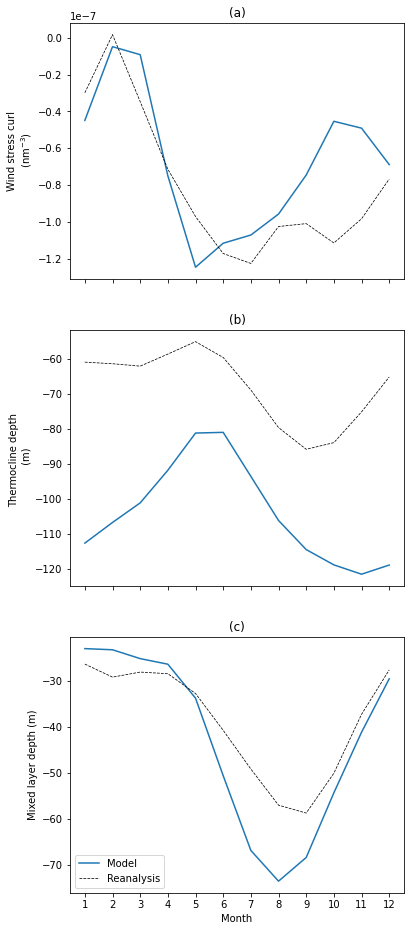

In [23]:
a = plot_monthly(-aTCM, Awsc, A_SST, aM, -gTCM, Gwsc, G_SST, gM, -12, 7, 50, 20, 'Seychelles-Chagos Thermocline Ridge')

In [24]:
#load in SST

A_SST = xr.open_dataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/TOS/tos_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').tos
A_SST = A_SST.mean('time').sel(lat=slice(-40,30),lon=slice(30,125))

#load in SST
G_SST = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/sst_con.nc').sst
LSM = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/lsmask_con.nc').mask
G_SST= G_SST.where(LSM[0])
G_SST = G_SST.mean('time').sel(lat=slice(-40,30),lon=slice(30,125))

In [25]:
#plto difference
SSTD = A_SST-G_SST

In [26]:
import matplotlib.patches as patches
from shapely import geometry

In [27]:
#A_SST = mT 

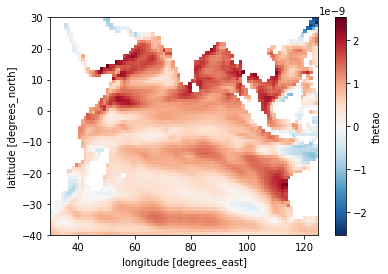

In [28]:
mT.mean('month').plot()

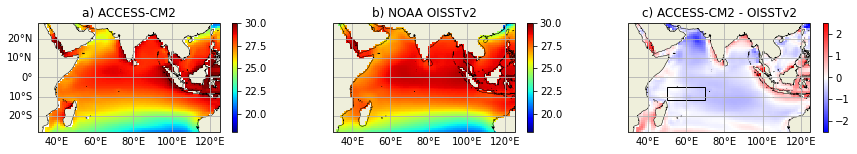

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 2), sharey='all', sharex='all', 
                             subplot_kw={'projection':ccrs.PlateCarree()})
a = axes[0].pcolormesh(A_SST.lon, A_SST.lat, A_SST, 
                                cmap = 'jet', 
                                vmin = 18, vmax = 30, 
                                transform=ccrs.PlateCarree())
plot_background(axes[0], 1, 0)
axes[0].set_title('a) ACCESS-CM2')
fig.colorbar(a, ax = axes[0])

g = axes[1].pcolormesh(G_SST.lon, G_SST.lat, G_SST, 
                                cmap = 'jet', 
                                vmin = 18, vmax = 30, 
                                transform=ccrs.PlateCarree())
axes[1].set_title('b) NOAA OISSTv2')

plot_background(axes[1], 1, 1)
fig.colorbar(g, ax = axes[1])

d = axes[2].pcolormesh(SSTD.lon, SSTD.lat, SSTD, 
                                cmap = 'bwr', 
                                vmin = -2.5, vmax = 2.5, 
                                transform=ccrs.PlateCarree())
axes[2].set_title('c) ACCESS-CM2 - OISSTv2')
axes[2].add_patch(patches.Rectangle((50,-12), 20, 7, color="k", fill = False))
plot_background(axes[2], 1, 2)
fig.colorbar(d, ax = axes[2])

In [30]:
A_SST.max()

<xarray.DataArray 'tos' ()>
array(32.5716629)

In [31]:
#load in temp and get dtdz
T = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/THETAO/*.nc').thetao
T = T[:,:5]
T = T.rename({'lev':'level'})
gT = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/pottmp/*.nc').pottmp
gT = gT[:,:5]
adtdz=(T[:,0] - T[:,-1])/float(T.level[-1])
gdtdz =(gT[:,0] - gT[:,-1])/float(gT.level[-1])
adtdz = adtdz.groupby('time.month').mean('time')
gdtdz = gdtdz.groupby('time.month').mean('time')


/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


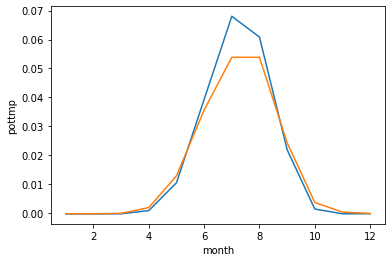

In [32]:
get_region(adtdz, 50, 20, -12, 7).plot()
get_region(gdtdz, 50, 20, -12, 7).plot()

In [33]:
gW = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/dzdt/*.nc').dzdt
U = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/UO/*.nc').uo
V = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/VO/*.nc').vo
U = U.assign_coords({'lat': T.lat, 'lon': T.lon})
V = V.assign_coords({'lat': T.lat, 'lon': T.lon})
U = U.rename({'lev':'level'})
V = V.rename({'lev':'level'})

dudx = U.differentiate(coord = 'lon') / (110e3 * np.cos(U.lat * np.pi / 180))
dvdy = V.differentiate(coord='lat') / (110e3)


weights = U.level#add a 0m surface layer
wt=np.array([0.])
for i in range(len(weights.values)):
    NW = 2*weights.values[i]-wt[i]
    wt = np.insert(wt,i+1,NW)
thickness = wt[1:]-wt[:-1]
thickness_DA = xr.DataArray(thickness, coords={'level': U.level},
             dims=['level'])
w_list = []
print(thickness_DA.level)


for i, j in enumerate(thickness_DA):
    if i == 0:
        w = (dudx[:,i]*j + dvdy[:,i]*j)
        #add to new DataArray with vertical coords put in
        w = w.assign_coords({'level': thickness_DA.level[i]})
        w_list.append(w)
    else:
        l = (dudx[:,i]*j + dvdy[:,i]*j) + w_list[i-1]
        w = l.assign_coords({'level': thickness_DA.level[i]})
        w_list.append(w)
#now put all layers into one array
w = xr.concat(w_list, dim = 'level')

<xarray.DataArray 'level' (level: 5)>
array([ 5., 15., 25., 35., 45.])
Coordinates:
  * level    (level) float64 5.0 15.0 25.0 35.0 45.0
Attributes:
    standard_name:  depth
    long_name:      ocean depth coordinate
    units:          m
    positive:       down
    axis:           Z
    bounds:         lev_bnds


In [34]:
gW = gW[:,4]
W = w[4,:]
gW = gW.groupby('time.month').mean('time')
W = W.groupby('time.month').mean('time')

/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


In [66]:
def plot_monthly(TM, TO, WM, WO, W_M, W_O, TC_M, TC_O, mld_A, mld_G, lat, lat_r, lon, lon_r):    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex='all')

    axes[0, 0].plot(TM.month, get_region(TM, lat, lat_r, lon, lon_r), label = 'ACCESS-CM2')
    axes[0, 0].plot(TO.month, get_region(TO, lat, lat_r, lon, lon_r), c = 'k', label = 'GODAS')
    axes[0, 0].set_ylabel('Temperature gradient (degC/m)')
    axes[0, 0].set_title('a) Vertical Temperature gradient ', loc='center')
    axes[0,0].legend()


    axes[0,1].plot(WM.month, get_region(WM, lat, lat_r, lon, lon_r), label = 'ACCESS-CM2')
    axes[0,1].plot(WO.month, get_region(WO, lat, lat_r, lon, lon_r), c = 'k',  label = 'GODAS')
    axes[0,1].set_ylabel('Vertical velocity  \n (m/s)')
    axes[0,1].set_title('b) Vertical velocity', loc='center')
    axes[0,1].legend()
    axes[0,1].set_xticks(np.arange(1,13,1))
    
    axes[1,1].plot(W_M.month, get_region(W_M, lat, lat_r, lon, lon_r), label = 'ACCESS-CM2')
    axes[1,1].plot(W_O.month, get_region(W_O, lat, lat_r, lon, lon_r), c = 'k', label = 'GODAS')
    axes[1,1].set_ylabel('Wind stress curl\n (nm$^{-3}$)')
    axes[1,1].set_title('d) Wind stress curl', loc='center')
    axes[1,1].legend()


    axes[1,0].plot(TC_M.month, get_region(TC_M, lat, lat_r, lon, lon_r), c = 'tab:blue', label = 'ACCESS-CM2 thermocline')
    axes[1,0].plot(TC_O.month, get_region(TC_O, lat, lat_r, lon, lon_r), c = 'k', label = 'GODAS Thermocline')
    axes[1,0].plot(mld_A.month, get_region(mld_A, lat, lat_r, lon, lon_r), c = 'tab:blue', 
                   ls = '--', lw = 0.75, label = 'Mixed layer ACCESS-CM2')
    axes[1,0].plot(mld_G.month, get_region(mld_G, lat, lat_r, lon, lon_r), c = 'k',
                   ls = '--', lw = 0.75, label = 'Mixed layer GODAS')
    axes[1,0].set_ylabel('Depth \n (m)')
    axes[1,0].set_title('c) Thermocline and mixed layer depth', loc='center')
    axes[1,0].legend()


    #plt.suptitle(Region)
    return fig

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

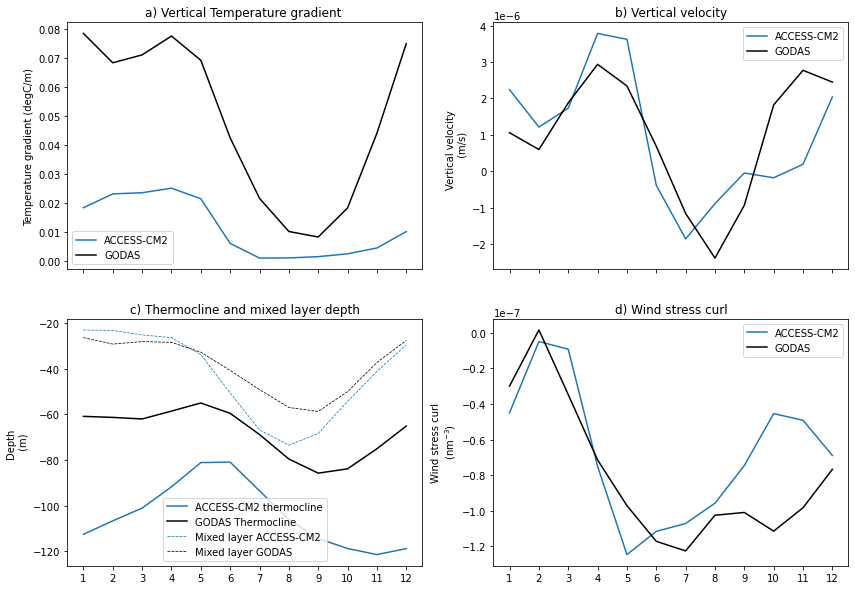

In [41]:
a = plot_monthly(adtdz, gdtdz, W, gW, Awsc, Gwsc,-aTCM, -gTCM, -aM, -gM, -12, 7, 50, 20)

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

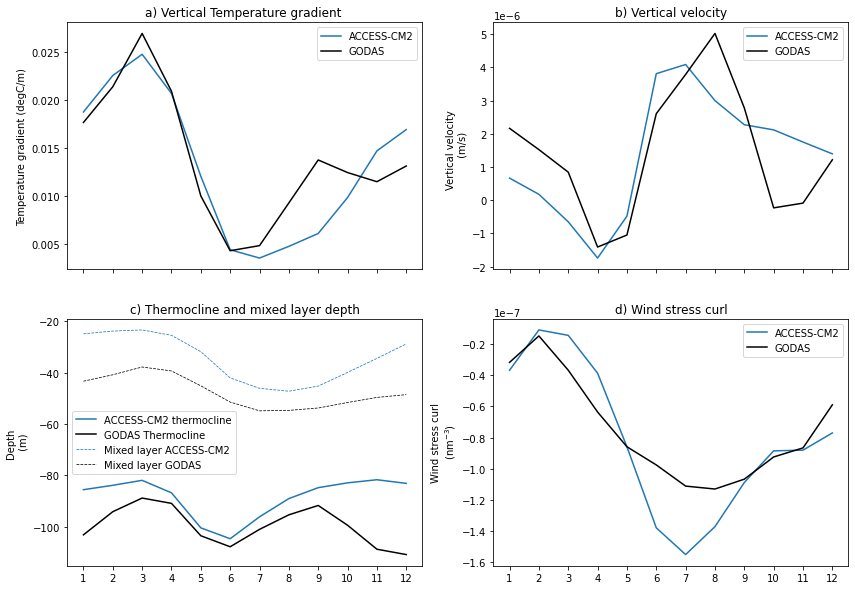

In [67]:
a = plot_monthly(adtdz, gdtdz, W, gW, Awsc, Gwsc,-aTCM, -gTCM, -aM, -gM, -10, 10, 90, 20)

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

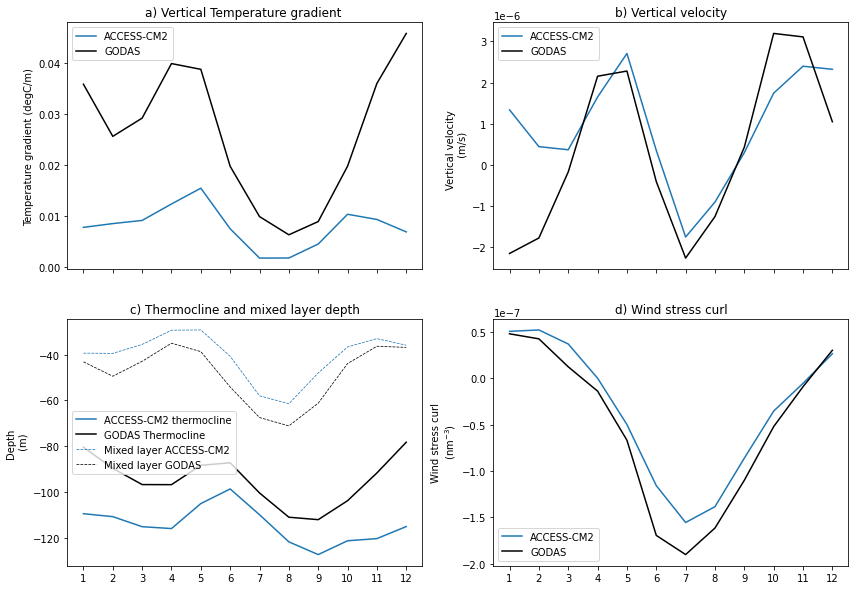

In [68]:
a = plot_monthly(adtdz, gdtdz, W, gW, Awsc, Gwsc,-aTCM, -gTCM, -aM, -gM, -10, 20, 50, 20)

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

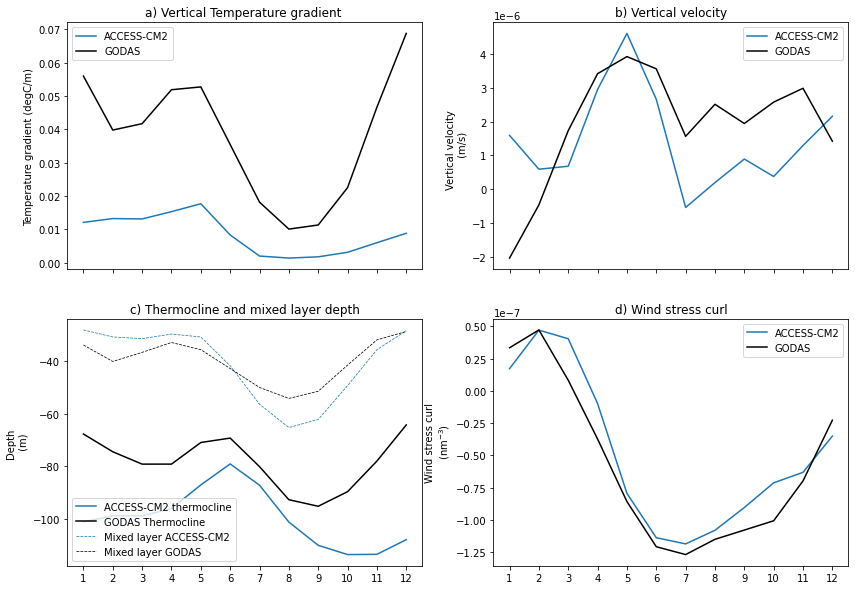

In [69]:
a = plot_monthly(adtdz, gdtdz, W, gW, Awsc, Gwsc,-aTCM, -gTCM, -aM, -gM, -10, 10, 50, 20)

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

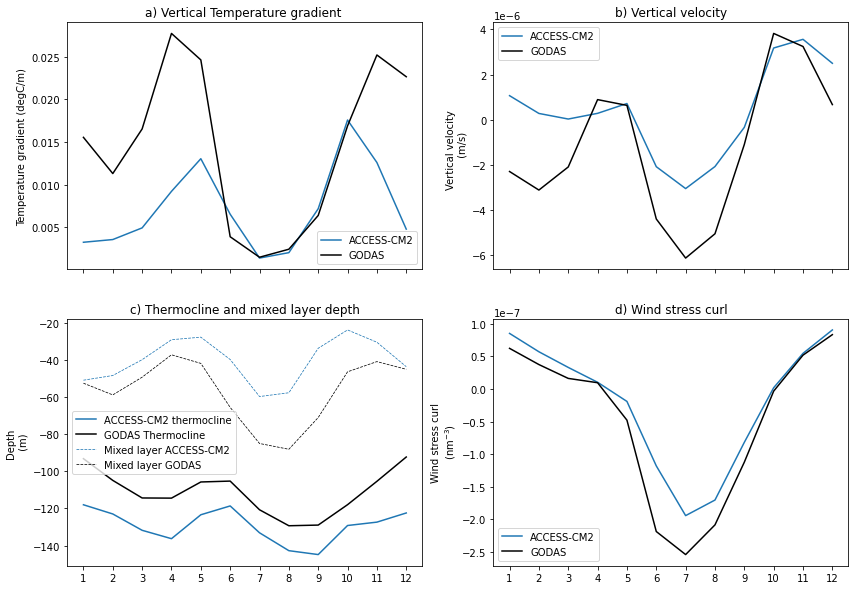

In [70]:
a = plot_monthly(adtdz, gdtdz, W, gW, Awsc, Gwsc,-aTCM, -gTCM, -aM, -gM, 0, 10, 50, 20)

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


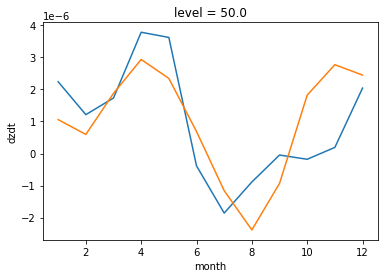

In [37]:
get_region(W, -12, 7, 50, 20 ).plot()
get_region(gW,  -12, 7,50, 20).plot()

<xarray.DataArray 'dzdt' (time: 492, lat: 180, lon: 360)>
dask.array<getitem, shape=(492, 180, 360), dtype=float32, chunksize=(12, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-12-01
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    level    float32 50.0
Attributes: (12/14)
    long_name:                Geometric vertical velocity
    units:                    m/s
    dataset:                  NCEP GODAS
    var_desc:                 geometric vertical velocity
    level_desc:               Multiple Levels
    statistic:                Monthly Mean
    ...                       ...
    center:                   US National Weather Service - NCEP (WMC)
    level_indicator:          160
    gds_grid_type:            0
    parameter_table_version:  2
    parameter_number:         40
    actual_range:             [-0.00075564  0.00068801]